<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/ROC_NEW_fet130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.06_without gamma.csv")

In [24]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])

In [25]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=129,random_state=0)
ada.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=129, random_state=0)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=3,random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=3, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=97,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=97, random_state=0)

In [30]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
gb_probs = gb.predict_proba(X_test)
ada_probs= ada.predict_proba(X_test)

In [31]:
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
ada_probs=ada_probs[:, 1]


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
ada_auc = roc_auc_score(y_test, ada_probs)


In [33]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)

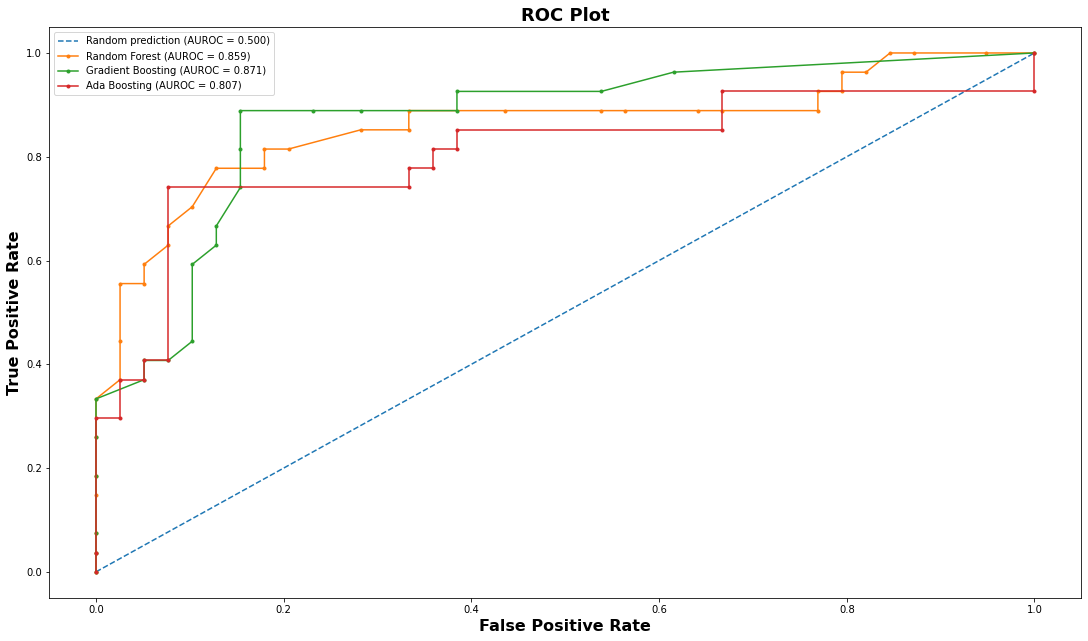

In [34]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='Ada Boosting (AUROC = %0.3f)' % ada_auc)

# Title
plt.title('ROC Plot',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC.png', dpi=100)
plt.show()